# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import statistics

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [ ]:
df = iris.data
headtail = df.head().append(df.tail())
headtail

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
df_2 = df.drop(['sepal width (cm)', 'petal width (cm)'], axis=1)

# Visualization

In [ ]:
px.scatter(x=df_2.iloc[:, 0], y=df_2.iloc[:, 1])

# K-Means

In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=3).fit(df_2)
kmeans2.cluster_centers_, kmeans2.labels_

(array([[5.87413793, 4.39310345],
        [5.00784314, 1.49215686],
        [6.83902439, 5.67804878]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32))

In [1]:
kmeans4 = KMeans(n_clusters=3, random_state=3).fit(df)
kmeans4.cluster_centers_, kmeans4.labels_

NameError: ignored

## Comparing methods

In [ ]:
diff = kmeans2.labels_ == kmeans4.labels_

print(f'Size: \t\t\t{diff.size}\nSame values: \t\t{sum(diff)}\nDifferent values: \t{diff.size - sum(diff)}\n{diff}')


Size: 			150
Same values: 		146
Different values: 	4
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


This was done to check if I could use `match: case:` methods by python but unfortunately not.

## Centroid calculations

---



### Seperating classes
Since we didn't have the centroids for the data, I firstly seperated the classes.

In [ ]:
import sys
print(sys.version)

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [ ]:
l0x, l0y, l1x, l1y, l2x, l2y = [],[],[],[],[],[]

for idx, k in enumerate(iris.target):
    dx = df_2.iloc[:, 0][idx]
    dy = df_2.iloc[:, 1][idx]
    
    if k == 0:
        l0x.append(dx)
        l0y.append(dy)
    elif k == 1:
        l1x.append(dx)
        l1y.append(dy)
    elif k == 2:
        l2x.append(dx)
        l2y.append(dy)

### Getting averages

Then I proceeded to take their means so that we can have some idea where the centroids would be 

In [ ]:
l0 = [statistics.mean(l0x), statistics.mean(l0y)]
l1 = [statistics.mean(l1x), statistics.mean(l1y)]
l2 = [statistics.mean(l2x), statistics.mean(l2y)]

l_centers = np.array([l0, l1, l2])

l_center_x, l_center_y = l_centers[:, 0], l_centers[:, 1]

In [ ]:
k2x, k2y = kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1]
k4x, k4y = kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,2]

# Comparing the results

---



(1.0, 6.9)

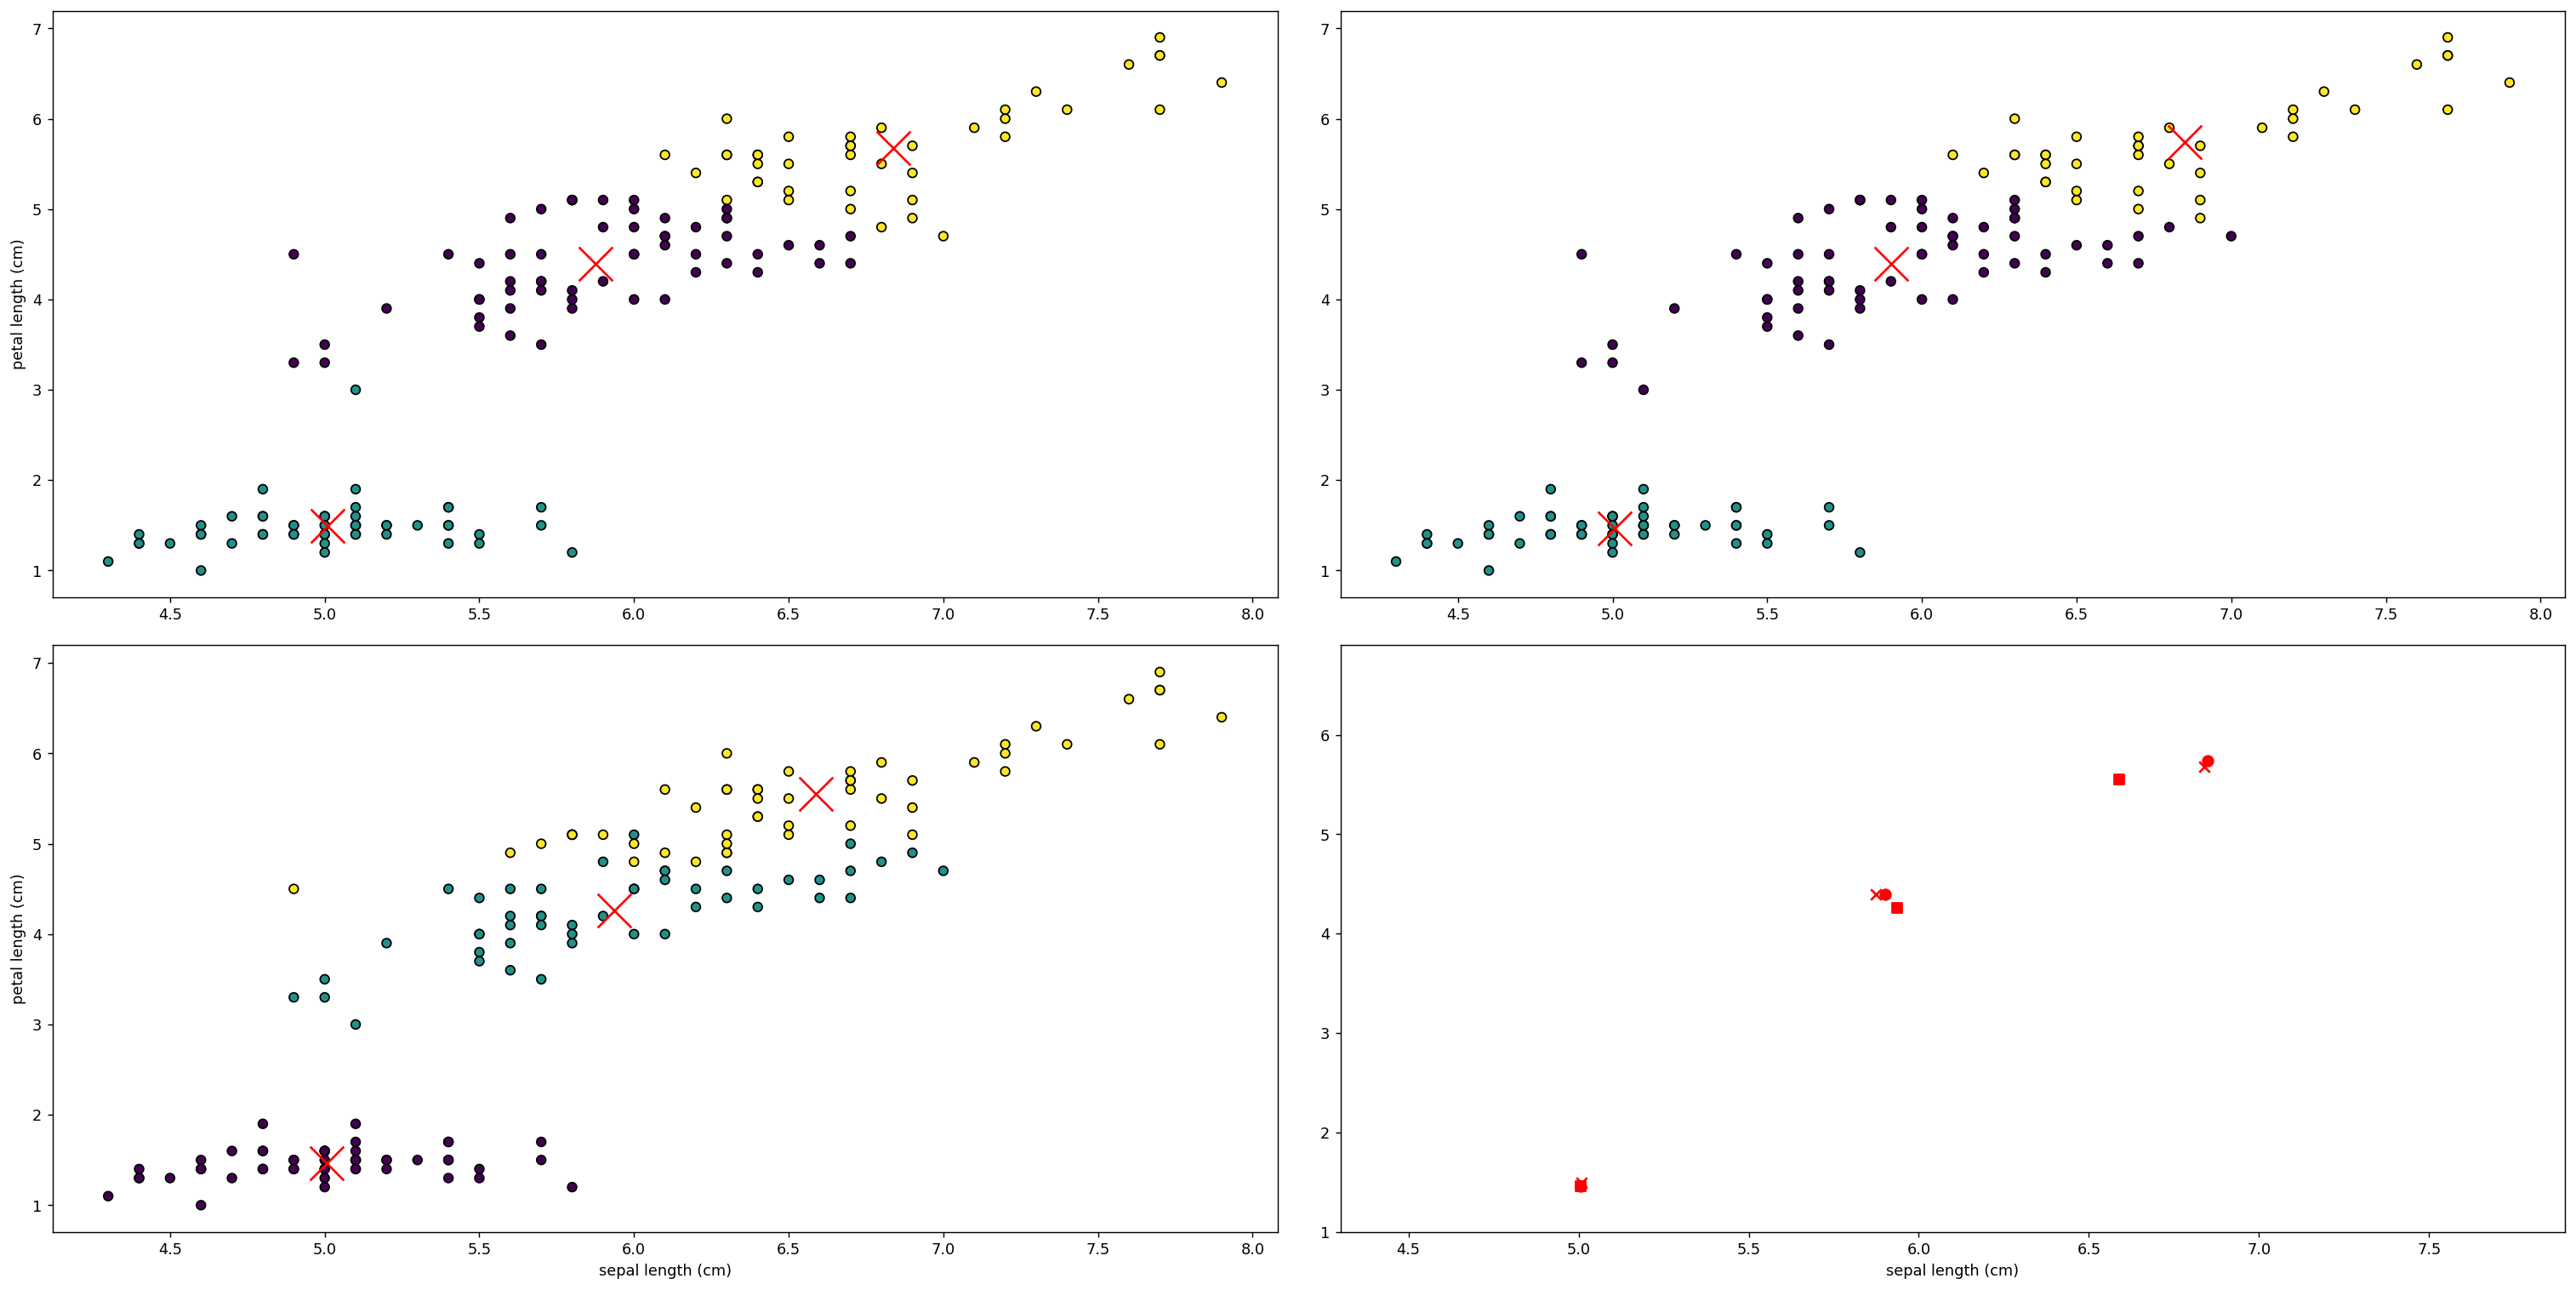

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(24,12), dpi=128)

x = df_2.iloc[:, 0]
y = df_2.iloc[:, 1]

plt.setp(ax[-1, :], xlabel='sepal length (cm)')
plt.setp(ax[:, 0], ylabel='petal length (cm)')


plt.tight_layout()
ax = ax.flatten()

ax[0].scatter(x=x, y=y, c=kmeans2.labels_, edgecolor="black")
ax[0].scatter(k2x, k2y, marker="x", s=500,  c="red")

ax[1].scatter(x=x, y=y, c=kmeans4.labels_, edgecolor="black")
ax[1].scatter(k4x, k4y, marker="x", s=500,  c="red")

ax[2].scatter(x=x, y=y, c=iris.target,     edgecolor="black")
ax[2].scatter(l_center_x, l_center_y, marker="x", s=500,  c="red")

ax[3].scatter(k2x, k2y,                 marker="x", s=50,  c="red")
ax[3].scatter(k4x, k4y,                 marker="o", s=50,  c="red")
ax[3].scatter(l_center_x, l_center_y,   marker="s", s=50,  c="red")
ax[3].set_xlim([x.min(), x.max()])
ax[3].set_ylim([y.min(), y.max()])

In [ ]:
print(f'{k2x}\n{k4x}\n{l_center_x}\n\n')
print(f'{k2y}\n{k4y}\n{l_center_y}')

[5.87413793 5.00784314 6.83902439]
[5.9016129 5.006     6.85     ]
[5.006 5.936 6.588]


[4.39310345 1.49215686 5.67804878]
[4.39354839 1.462      5.74210526]
[1.462 4.26  5.552]
